# Final Project 3 - Ensemble (Random Forest)

# Introduction

Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

## Latar Belakang

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 13 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

## Informasi Atribut

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes 
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung 
6. high_blood_pressure - apakah pasien punya darah tinggi 
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL 
8. serum_creatinine - level serum creatinine di darah dalam mg/dL 
9. serum_sodium - level serum sodium di darah dalam mEq/L 
10. sex - apakah pasien pria atau wanita 
11. smoking - apakah pasien merokok 
12. time - waktu dalam hari untuk follow-up 
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble (Random Forest) sebagai berikut:\
● Mampu memahami konsep Classiﬁcation dengan Ensemble (Random Forest) Model\
● Mampu mempersiapkan data untuk digunakan dalam Ensemble (Random Forest) Model\
● Mampu mengimplementasikan Ensemble (Random Forest) Model untuk membuat prediksi

# Import Libraries

cell pertama pada notebook hanya berisi semua library yang digunakan dalam project.

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import pydotplus
import matplotlib.pyplot as plt
#import pickle
#import joblib
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# Data Loading

bagian ini berisi proses data loading.

In [238]:
#data loading

df = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [239]:
#melihat dimensi data

df.shape

(299, 13)

dari output diatas, terlihat bahwa data ini berjumlah 299 baris dan 13 kolom. lalu, akan dilanjutkan ke tahap data cleaning.

# Data Cleaning

bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [240]:
#melihat tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dari output diatas, terlihat bahwa tipe data pada kolom sudah sesuai. selanjutnya akan mengecek missing value.

In [241]:
#cek missing value

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dari output diatas, terlihat bahwa data tidak memiliki missing value. selanjutnya akan dicek, duplikasi data.

In [242]:
#cek duplikasi data

df.duplicated().sum()

0

dari output diatas, terlihat bahwa tidak terdapat duplikasi data. sehingga akan dilanjutkan melihat analisis deskriptif.

In [243]:
#melihat analisis deskriptif

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


dari output diatas, terlihat analisis deskriptif dari data. kemudian, akan dilihat variabel yang mengandung outlier.

C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-p

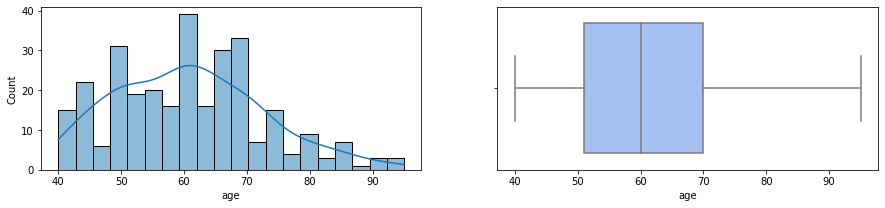

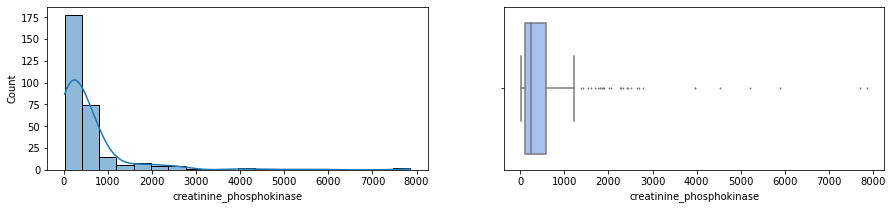

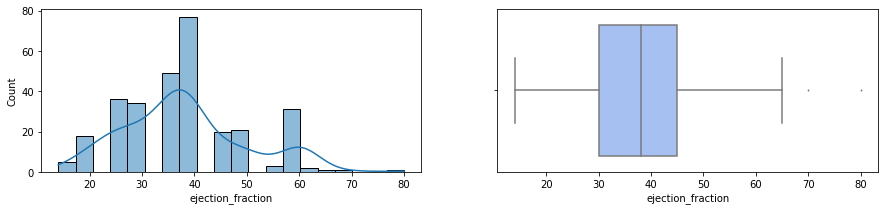

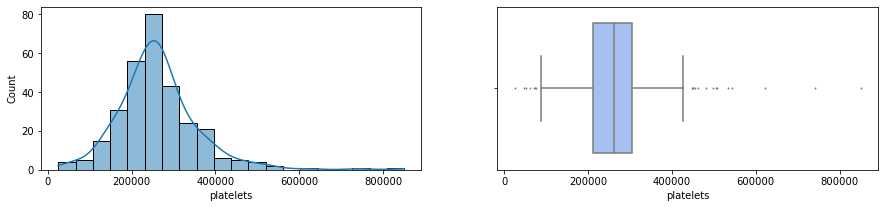

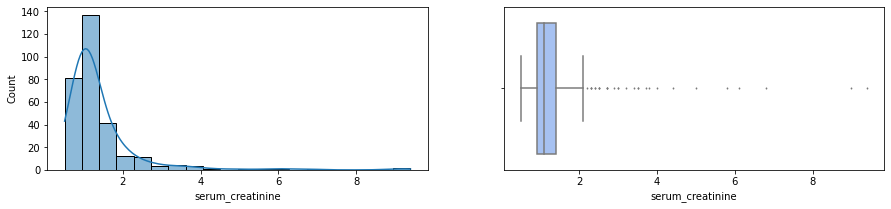

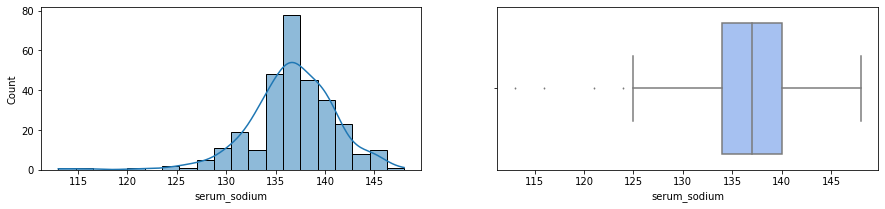

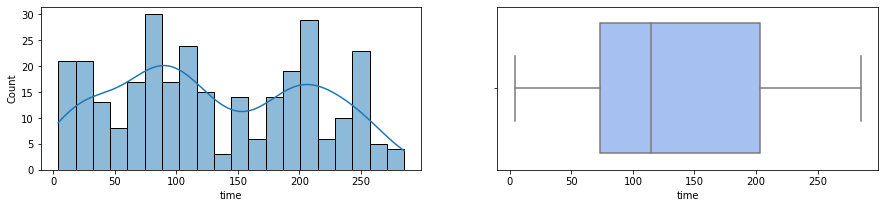

In [244]:
#melihat variabel yang mengandung outlier

num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

dari output diatas, terlihat bahwa hampir semua variabel mengandung outliers kecuali variabel age dan time. sehingga, variabel-variabel yang mengandung outliers akan dihandling dengan IQR atau Interquartile Range.

In [245]:
#memilih variabel yang mengandung outliers
features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

#handling outliers
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

setelah dilakukan handling outliers menggunakan metode IQR, dimana data yang memiliki nilai lebih dari atau kurang dari (outliers) maka nilainya akan diganti menjadi nilai maksimum dalam IQR. selanjutnya, akan melihat kembali datanya apakah outliers sudah terhandle.

C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Isal\anaconda3\lib\site-p

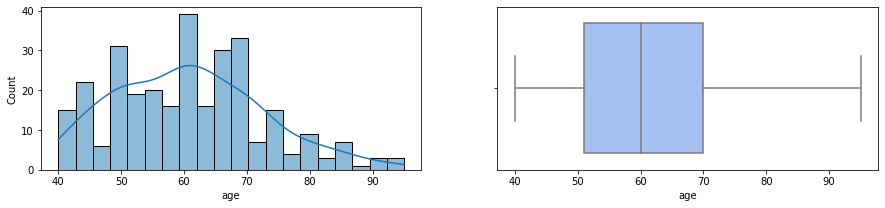

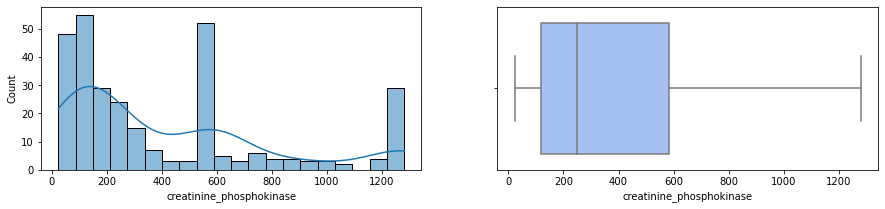

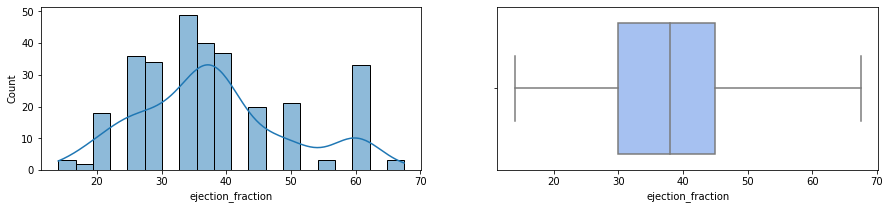

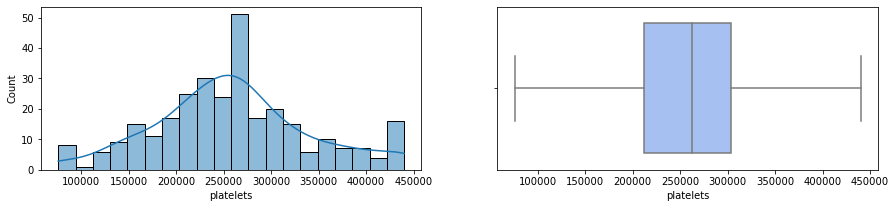

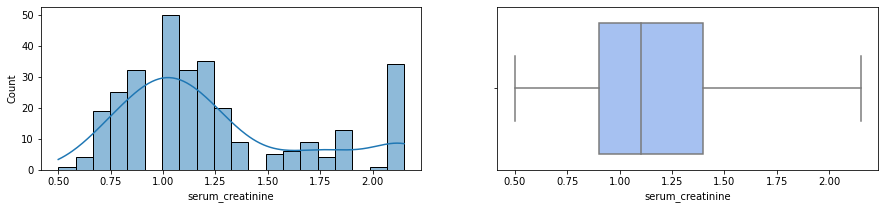

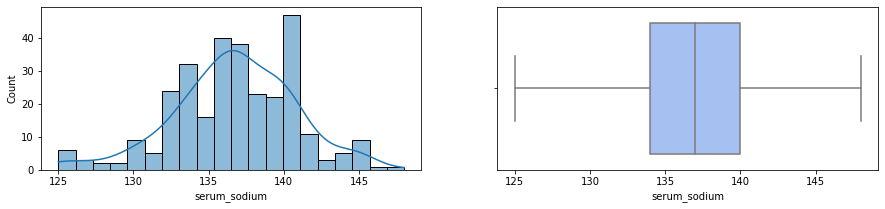

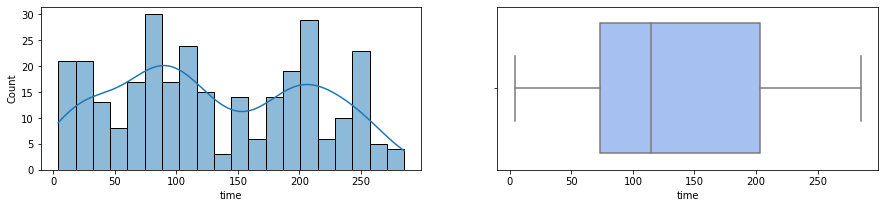

In [246]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

berdasarkan output diatas, terlihat bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik. tahap selanjutnya, akan dilakukan eksplorasi data.

# Eksplorasi Data

bagian ini berisi eksplorasi pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Korelasi Antar Variabel (Heatmap)

bagian ini berisikan visualisasi korelasi antar variabel (heatmap).

<AxesSubplot:title={'center':'Correlation Heatmap of Heart Failure Prediction'}>

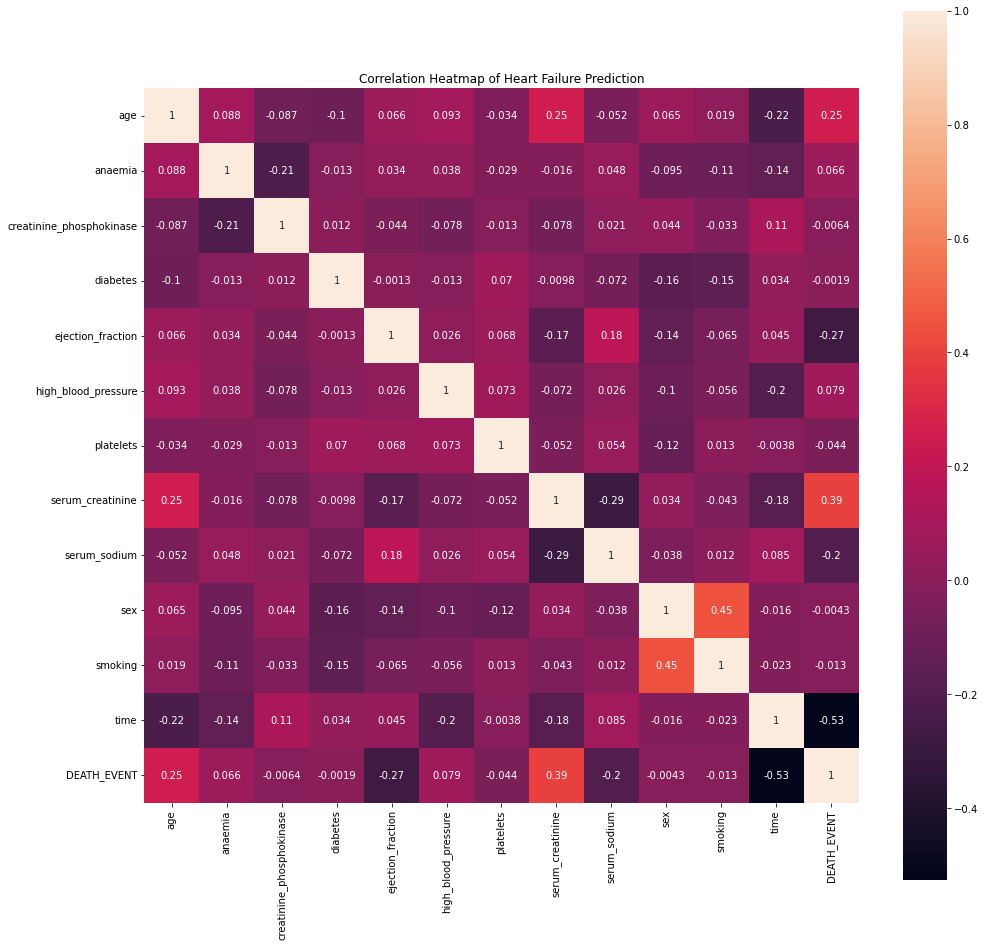

In [247]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((16,16))
sns.heatmap(df.corr(), square = True, annot = True)

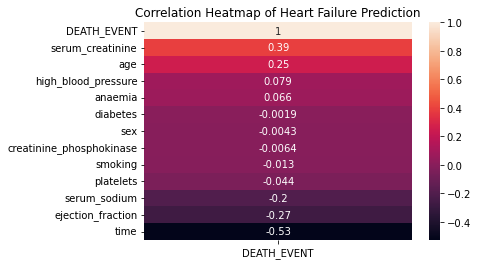

In [248]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel time.

## Anaemia

bagian ini berisikan visualisasi pada frekuensi anemia

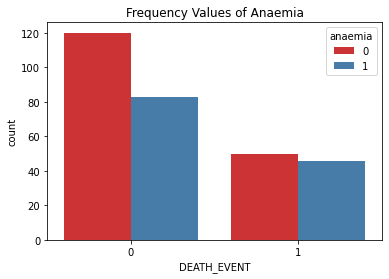

In [249]:
sns.countplot(x ='DEATH_EVENT', hue = "anaemia", data = df, palette = "Set1")
plt.title('Frequency Values of Anaemia')
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa perbandingan antara seseorang yang memiliki anemia atau tidak, cenderung lebih banyak yang hidup dibandingkan dengan yang meninggal.

## Diabetes

bagian ini berisikan visualisasi pada frekuensi diabetes

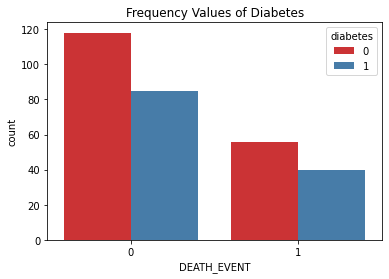

In [250]:
sns.countplot(x ='DEATH_EVENT', hue = "diabetes", data = df, palette = "Set1")
plt.title('Frequency Values of Diabetes')
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa perbandingan antara seseorang yang memiliki diabetes atau tidak, cenderung lebih banyak yang hidup dibandingkan dengan yang meninggal.

##  High Blood Pressure¶

bagian ini berisikan visualisasi pada frekuensi darah tinggi

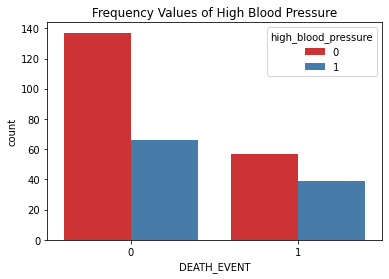

In [251]:
sns.countplot(x ='DEATH_EVENT', hue = "high_blood_pressure", data = df, palette = "Set1")
plt.title('Frequency Values of High Blood Pressure')
plt.show()

**interpretasi:**

berdasarkan output diatas, terlihat bahwa perbandingan antara seseorang yang memiliki darah tinggi atau tidak, cenderung lebih banyak yang hidup dibandingkan dengan yang meninggal.

##  Sex

bagian ini berisikan visualisasi pada frekuensi jenis kelamin.

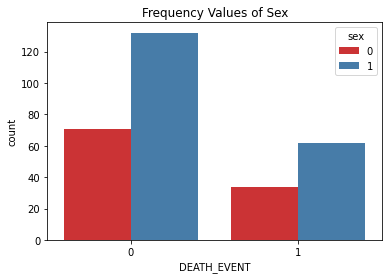

In [252]:
sns.countplot(x ='DEATH_EVENT', hue = "sex", data = df, palette = "Set1")
plt.title('Frequency Values of Sex')
plt.show()

**interpretasi:**

berdasarkan output diatas, terlihat bahwa frekuensi seseorang yang meninggal lebih banyak berjenis kelamin wanita dibandingkan pria, begitupun dengan frekuensi seseorang yang hidup lebih banyak yang berjenis kelamin wanita.

##  Smoking

bagian ini berisikan visualisasi pada frekuensi merokok.

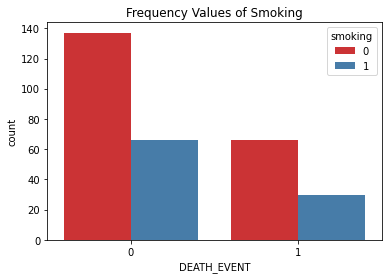

In [253]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = df, palette = "Set1")
plt.title('Frequency Values of Smoking')
plt.show()

**interpretasi:**

berdasarkan output diatas, terlihat bahwa perbandingan antara seseorang yang memiliki merokok atau tidak, cenderung lebih banyak yang hidup dibandingkan dengan yang meninggal.

##  Death Event

bagian ini berisikan visualisasi pada frekuensi peristiwa kematian.

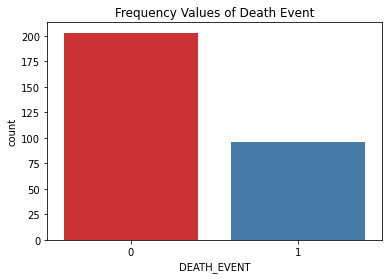

In [254]:
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set1')
plt.title('Frequency Values of Death Event')
plt.show()

**interpretasi:**

berdasarkan output diatas, terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. imbalanced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. selanjutnya akan dilakukan penanganan agar data menjadi seimbang.

# Pre-processing

bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

sebelum melakukan handling imbalancing, akan mendeklarasikan variabel fitur "X" dan variabel target "y"

In [255]:
#deklarasi variabel fitur "X" dan variabel target "y"

X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT'] 

dari output diatas, setelah mendeklarasikan variabel X dan y. selanjutnya, akan menghandling imbalancing data menggunakan metode Undersampling, yaitu menghapus data major agar datanya balance dengan data minor.

In [256]:
#handling imbalancing dengan undersampling

under_sampel = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_under, y_train_under = under_sampel.fit_resample(X, y)

dari output diatas, setelah menghandling imbalancing data. maka akan dilihat jumlah data dari variabel DEATH_EVENT apakah benar sudah memiliki jumlah yang sama.

In [257]:
#melihat jumlah data 

y_train_under.value_counts()

0    96
1    96
Name: DEATH_EVENT, dtype: int64

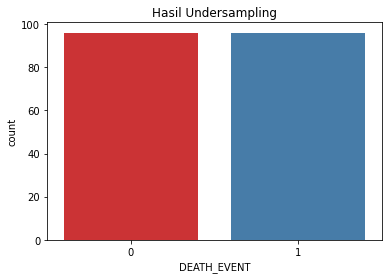

In [258]:
#plot data yang sudah balance

sns.countplot(x = y_train_under, palette = 'Set1')
plt.title('Hasil Undersampling')
plt.show()

berdasarkan output dan plot diatas, terlihat bahwa kolom DEATH_EVENT dari masing-masing kelas menunjukan data yang balance berjumlah 96. lalu, akan dilakukan train/test split menjadi 80% training dan 20% testing.

In [259]:
#split data menjadi 80% training dan 20% testing

X_train, X_test, y_train, y_test = train_test_split(X_train_under, y_train_under, test_size=0.2, random_state=42)

setelah mendefinisikan variabel X dan y pada tahap sebelumnya, kita telah mengimplementasikan train/test split menjadi 80% training dan 20% testing, selanjutnya akan masuk ke dalam model Random Forest.

# Random Forest

## Define Model

bagian ini berisi cell untuk mendeﬁnisikan model.

In [260]:
#menentukan model klasifikasi
model = RandomForestClassifier()

#training model
model_rf = model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model_rf.predict(X_test)

berdasarkan output diatas, dapat dilihat bahwa model klasifikasi yang akan digunakan adalah Random Forest. selanjutnya, akan dilakukan pelatihan model.

# Model Training

cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [261]:
#prediksi respon untuk dataset test
y_pred = model_rf.predict(X_test)

#membuat hasil prediksi death event
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['Predicted_DeathEvent'] = y_pred
df_test.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Predicted_DeathEvent
45,69.0,0,1280.25,0,40.0,0,105000.00,1.00,135,1,1,147,0
136,51.0,0,1280.25,0,25.0,1,271000.00,0.90,130,1,0,38,1
76,60.0,0,59.00,0,25.0,1,212000.00,2.15,136,1,1,187,1
143,70.0,1,69.00,1,50.0,1,351000.00,1.00,134,0,0,44,1
113,70.0,1,125.00,0,25.0,1,237000.00,1.00,140,0,0,15,1
177,65.0,0,395.00,1,25.0,0,265000.00,1.20,136,1,1,154,0
15,60.0,0,253.00,0,35.0,0,279000.00,1.70,140,1,0,250,0
18,58.0,1,200.00,1,60.0,0,300000.00,0.80,137,0,0,104,0
16,67.0,0,582.00,0,50.0,0,263358.03,1.18,137,1,1,76,0
9,70.0,0,618.00,0,35.0,0,327000.00,1.10,142,0,0,245,0


berdasarkan tabel diatas, dapat dilihat bahwa sudah ada hasil prediksi keselamatan pasien dari penyakit jantung menggunakan model Random Forest. selanjutnya, akan mengevaluasi model untuk melihat nilai akurasi dan MSE dari model Random Forest.

# Model Evaluasi

pada bagian ini, dilakukan model evaluasi yang harus menunjukkan bagaimana performa model. hal ini dibuktikan dengan melihat nilai akurasi dan tingkat kesalahan model (MSE). 

In [262]:
#melihat nilai akurasi dan MSE

print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Accuracy Score: 0.8974358974358975
Mean Squared Error: 0.10256410256410256


**interpretasi**

berdasarkan output diatas, terlihat bahwa model Random Forest memiliki nilai akurasi yang tinggi sebesar 0.9230769230769231 atau sekitar 92.3% dengan nilai MSE sebesar 0.07692307692307693.

# Kesimpulan

Jadi, dapat disimpulkan bahwa:
1. Dari kedua model tersebut didapatkan akurasi tertinggi ada pada model Random Forest sebesar 0.9230769230769231 atau sekitar 92.3% dengan nilai MSE sebesar 0.07692307692307693. sehinggga, model Random Forest sangat akurat dalam keselamatan pasien dari penyakit jantung.
2. Fitur-fitur yang digunakan untuk membuat model sudah tepat sasaran.